# Relatório de Qualidade dos Dados

Este notebook gera um **relatório completo de qualidade dos dados** após o processo de limpeza.

## Objetivos:
- Avaliar a completude dos dados (% de valores preenchidos)
- Medir a unicidade (detectar duplicatas)
- Verificar consistência dos valores
- Validar regras de negócio
- Gerar score geral de qualidade
- Criar visualizações do estado dos dados

## Dimensões de Qualidade:
1. **Completude**: Proporção de dados preenchidos
2. **Unicidade**: Ausência de duplicatas
3. **Consistência**: Valores dentro de padrões esperados
4. **Validade**: Conformidade com regras de negócio

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.8 MB 11.2 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 14.7 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 14.7 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 20.3 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------------------------ --------- 5.2/7.0 MB 26.5 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 22.6 MB/s  0:00:00

   ---------------------------------------- 0/8 [pyparsing]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 

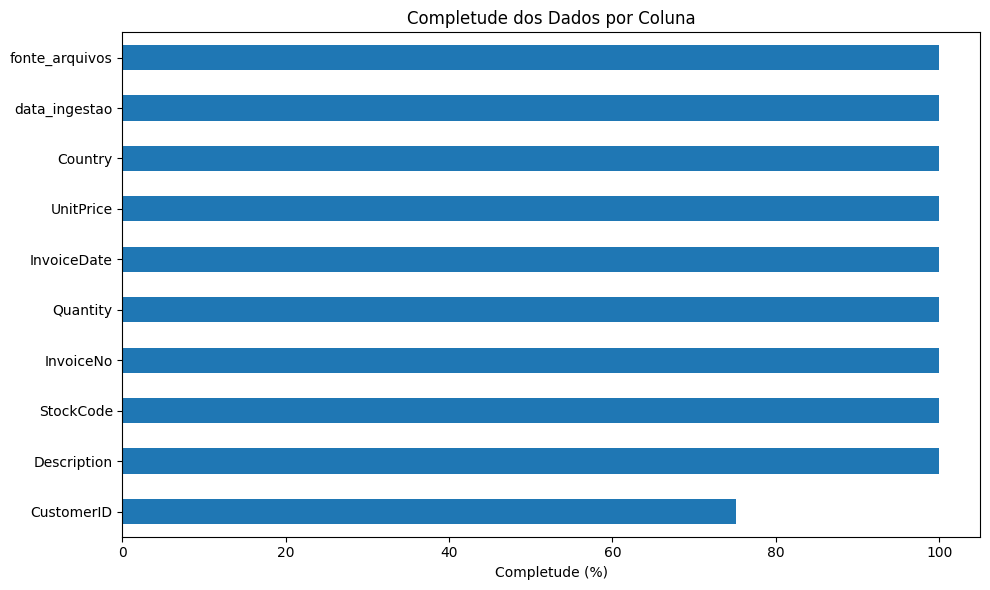

In [ ]:
# %pip install matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
# Carregar dados limpos
df = pd.read_parquet('data/silver/dados_limpos.parquet')
print("="*50)
print("RELATÓRIO DE QUALIDADE DE DADOS")
print("="*50)
# ==========================================
# 1. COMPLETUDE
# ==========================================
print("\n1. COMPLETUDE DOS DADOS")
print("-" * 50)
total_celulas = df.shape[0] * df.shape[1]
celulas_preenchidas = df.count().sum()
completude_geral = (celulas_preenchidas / total_celulas) * 100
print(f"Completude Geral: {completude_geral:.2f}%")
print("\nCompletude por coluna:")
for coluna in df.columns:
    valores_preenchidos = df[coluna].count()
    total = len(df)
    percentual = (valores_preenchidos / total) * 100
    print(f" {coluna}: {percentual:.2f}%")

# ==========================================
# 2. UNICIDADE
# ==========================================
print("\n2. UNICIDADE DOS DADOS")
print("-" * 50)
duplicatas = df.duplicated().sum()
unicidade = ((len(df) - duplicatas) / len(df)) * 100
print(f"Linhas únicas: {unicidade:.2f}%")
print(f"Duplicatas encontradas: {duplicatas}")
# ==========================================
# 3. CONSISTÊNCIA
# ==========================================
print("\n3. CONSISTÊNCIA DOS DADOS")
print("-" * 50)
# Exemplo: verificar se valores numéricos são positivos
# for coluna in ['valor_total', 'quantidade']:
# if coluna in df.columns:
# negativos = (df[coluna] < 0).sum()
# print(f"{coluna}: {negativos} valores negativos encontrados")
# Exemplo: verificar se datas estão no passado
# if 'data_compra' in df.columns:
# df['data_compra'] = pd.to_datetime(df['data_compra'])
# futuras = (df['data_compra'] > pd.Timestamp.now()).sum()
# print(f"Datas no futuro: {futuras}")
# ==========================================
# 4. VALIDADE
# ==========================================
print("\n4. VALIDADE DOS DADOS")
print("-" * 50)
# Exemplo: verificar ranges válidos
# if 'idade' in df.columns:
# fora_range = ((df['idade'] < 0) | (df['idade'] > 120)).sum()
# print(f"Idades inválidas: {fora_range}")
# ==========================================
# 5. VISUALIZAÇÃO
# ==========================================
# Gráfico de completude
plt.figure(figsize=(10, 6))
completude_por_coluna = (df.count() / len(df) * 100).sort_values()
completude_por_coluna.plot(kind='barh')
plt.xlabel('Completude (%)')
plt.title('Completude dos Dados por Coluna')
plt.tight_layout()
plt.savefig('data/quality_report.png')
print("\nGráfico de qualidade salvo em: data/quality_report.png")
# ==========================================
# SCORE FINAL
# ==========================================
print("\n" + "="*50)
print("SCORE GERAL DE QUALIDADE")
print("="*50)
# Score simples: média de completude e unicidade
score_final = (completude_geral + unicidade) / 2
print(f"Score Final: {score_final:.2f}%")
if score_final >= 90:
    print("Classificação: EXCELENTE")
elif score_final >= 80:
    print("Classificação: BOM")
elif score_final >= 70:
    print("Classificação: REGULAR")
else:
    print("Classificação: NECESSITA MELHORIAS")

### Análise de Qualidade Completa

Este código gera um relatório abrangente que inclui:

**1. Completude:**
- Percentual geral de células preenchidas
- Completude por coluna individual

**2. Unicidade:**
- Percentual de linhas únicas
- Contagem de duplicatas

**3. Consistência e Validade:**
- Seções preparadas para validações específicas do negócio
- Exemplos de verificações: valores negativos, datas inválidas, ranges

**4. Visualização:**
- Gráfico de barras mostrando completude por coluna
- Salvo como imagem PNG

**5. Score Final:**
- Classificação geral da qualidade (Excelente/Bom/Regular/Necessita Melhorias)
- Média ponderada das dimensões analisadas

Este relatório é fundamental para documentar a qualidade dos dados e identificar áreas que ainda necessitam atenção.